In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from utils_image import compute_zpos_sp, get_meanZstack
from scanimagetiffio import SITiffIO

### Get the correlation of the superficial and deep layers with zstacks

In [45]:
#get meanzstacks
zstack_folder = "/media/zilong/4TB Storage HDD/2PImaging/183_06082023_largezstack/"

#if meanZstack.npy already exists, then load it
if os.path.exists(os.path.join(zstack_folder, "DP_exp/meanstacks.npy")):
    meanstacks = np.load(os.path.join(zstack_folder, "DP_exp/meanstacks.npy"))
else:
    # read the rotation center from the circlecenter txt file
    circlecenterfilename = zstack_folder+"DP_exp/circlecenter.txt"
    with open(circlecenterfilename, "r") as f:
        # read the last row
        last_line = f.readlines()[-1]
        # assign the x and y coordinates to self.rotx and self.roty
        rotx = float(last_line.split()[0])
        roty = float(last_line.split()[1])
    print("Rotation center is at ({}, {})".format(rotx, roty))

    tiffpath = os.path.join(zstack_folder, 'stack06082023_00001.tif')
    logpath = os.path.join(zstack_folder, 'REdata_20230806_141637.stack00001.txt')
    volume = 1; stacks=81; frames=200; Rotcenter=[rotx, roty]; ImgReg=True

    S = SITiffIO()
    S.open_tiff_file(tiffpath, "r")
    S.open_rotary_file(logpath)
    S.interp_times() 
    meanstacks = get_meanZstack(S, volume, stacks, frames, Rotcenter, ImgReg)

    #save the meanZ stack as npy file
    np.save(os.path.join(zstack_folder, "DP_exp/meanstacks.npy"), meanstacks)


In [46]:
#load meanImage from superficial layer
superficial_folder = "/media/zilong/4TB Storage HDD/2PImaging/183_06082023_superficial"

#load ops
ops =  np.load(os.path.join(superficial_folder, 'UnrotTiff/suite2p/plane0', 'ops.npy'), allow_pickle=True)
ops = ops.item()
superf_meanIm = ops['meanImg']

#transpose superf_meanIm
superf_meanIm = superf_meanIm.T
#add a axis on dim 0 of superf_meanIm
superf_meanIm = np.expand_dims(superf_meanIm, axis=0)
_, _, corrMatrix_superf = compute_zpos_sp(meanstacks, superf_meanIm, ops)


#load meanImage from deep layer
deep_folder = "/media/zilong/4TB Storage HDD/2PImaging/183_06082023_deep"

#load ops
ops =  np.load(os.path.join(deep_folder, 'UnrotTiff/suite2p/plane0', 'ops.npy'), allow_pickle=True)
ops = ops.item()
deep_meanIm = ops['meanImg']
#transpose deep_meanIm
deep_meanIm = deep_meanIm.T
#add a axis on dim 0 of deep_meanIm
deep_meanIm = np.expand_dims(deep_meanIm, axis=0)
_, _, corrMatrix_deep = compute_zpos_sp(meanstacks, deep_meanIm, ops)

1 planes, 0/1 frames, 0.06 sec.
11 planes, 0/1 frames, 0.48 sec.
21 planes, 0/1 frames, 0.81 sec.
31 planes, 0/1 frames, 1.09 sec.
41 planes, 0/1 frames, 1.35 sec.
51 planes, 0/1 frames, 1.62 sec.
61 planes, 0/1 frames, 1.89 sec.
71 planes, 0/1 frames, 2.14 sec.
80 planes, 0/1 frames, 2.35 sec.
1 planes, 0/1 frames, 0.07 sec.
11 planes, 0/1 frames, 0.32 sec.
21 planes, 0/1 frames, 0.55 sec.
31 planes, 0/1 frames, 0.82 sec.
41 planes, 0/1 frames, 1.04 sec.
51 planes, 0/1 frames, 1.35 sec.
61 planes, 0/1 frames, 1.60 sec.
71 planes, 0/1 frames, 1.85 sec.
80 planes, 0/1 frames, 2.14 sec.


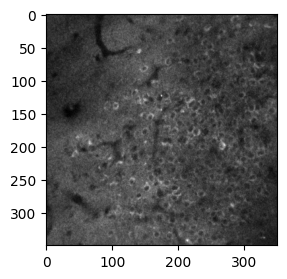

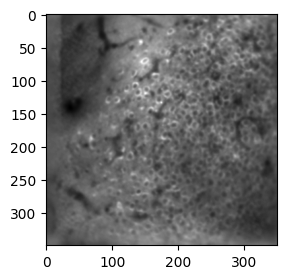

In [30]:
#plot a slice in meanstacks
plt.figure(figsize=(3,3))
plt.imshow(superf_meanIm, cmap='gray')

Text(0, 0.5, 'correlation')

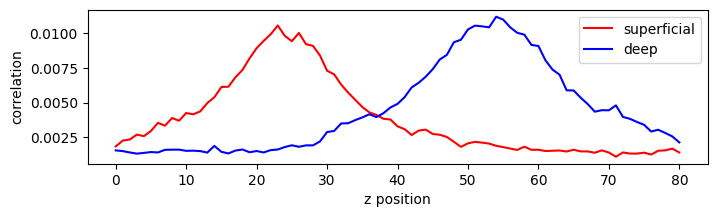

In [47]:
#plot the two correlation matrix with different color
plt.figure(figsize=(8,2))
plt.plot(corrMatrix_superf, 'r', label='superficial')
plt.plot(corrMatrix_deep, 'b', label='deep')
plt.legend()
plt.xlabel('z position')
plt.ylabel('correlation')


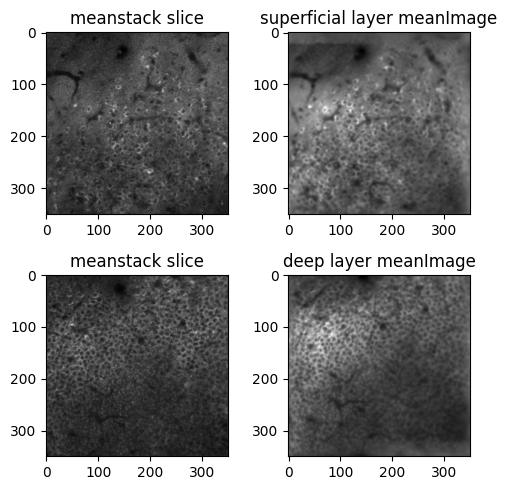

In [44]:
#plot meanstack slice and superficial layer meanImage
fig, axs = plt.subplots(2,2, figsize=(5,5))
axs[0,0].imshow(meanstacks[20,:,:], cmap='gray')
axs[0,0].set_title('meanstack slice')
axs[0,1].imshow(superf_meanIm[0,:,:], cmap='gray')
axs[0,1].set_title('superficial layer meanImage')

axs[1,0].imshow(meanstacks[55,:,:], cmap='gray')
axs[1,0].set_title('meanstack slice')
axs[1,1].imshow(deep_meanIm[0,:,:], cmap='gray')
axs[1,1].set_title('deep layer meanImage')

plt.tight_layout()